In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [ ]:
# Filter the data for ATIS and TREC
df = pd.read_csv("classifiers/training_results.csv")
atis_data = df[df['data'].str.contains('atis')]
trec_data = df[df['data'].str.contains('trec')]

# Extract the subset sizes
atis_data['subset_size'] = atis_data['data'].str.extract('(\d+)_subset').astype(int)
trec_data['subset_size'] = trec_data['data'].str.extract('(\d+)_subset').astype(int)

atis_data = atis_data.sort_values(by='subset_size')
trec_data = trec_data.sort_values(by='subset_size')

<ipython-input-13-910e4d67eafd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atis_data['subset_size'] = atis_data['data'].str.extract('(\d+)_subset').astype(int)
<ipython-input-13-910e4d67eafd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trec_data['subset_size'] = trec_data['data'].str.extract('(\d+)_subset').astype(int)


In [ ]:
trec_data.head()

,data,model,val_accuracy,subset_size
39,trec_5_subset,bert_ktrain,0.2803,5
37,trec_5_subset,svm_glove,0.3022,5
36,trec_5_subset,svm_tfidf,0.4169,5
38,trec_5_subset,lstm_glove,0.3956,5
31,trec_10_subset,bert_ktrain,0.6238,10


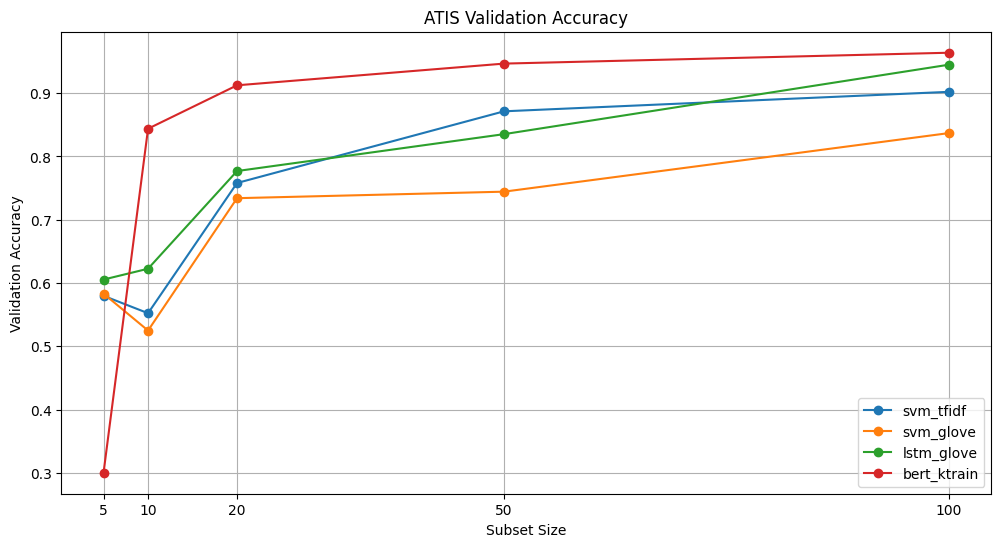

In [ ]:
# Plot ATIS data
plt.figure(figsize=(12, 6))
for model in atis_data['model'].unique():
    subset = atis_data[atis_data['model'] == model]
    plt.plot(subset['subset_size'], subset['val_accuracy'], marker='o', label=model)

plt.title('ATIS Validation Accuracy')
plt.xlabel('Subset Size')
plt.ylabel('Validation Accuracy')
plt.xticks([5, 10, 20, 50, 100])
plt.legend()
plt.grid(True)
plt.show()

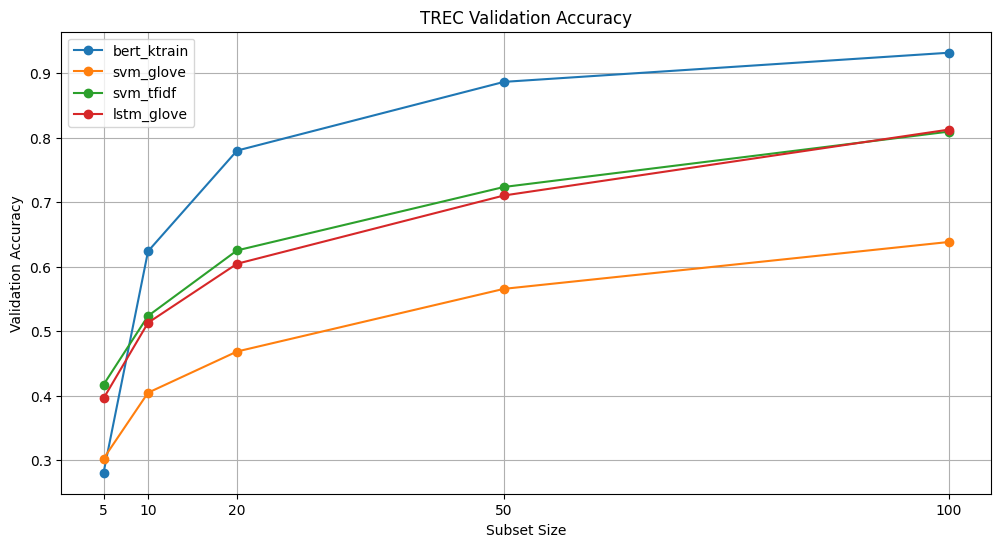

In [ ]:
# Plot TREC data
plt.figure(figsize=(12, 6))
for model in trec_data['model'].unique():
    subset = trec_data[trec_data['model'] == model]
    plt.plot(subset['subset_size'], subset['val_accuracy'], marker='o', label=model)

plt.title('TREC Validation Accuracy')
plt.xlabel('Subset Size')
plt.ylabel('Validation Accuracy')
plt.xticks([5, 10, 20, 50, 100])
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Load the data
df = pd.read_csv('filtered_datasets/Lambada/GPT2/ATIS/bert_ktrain/GPT2_ATIS_100_augmented_data_bert_ktrain.csv')

# Filter correct predictions
correct_predictions = df[df['label'] == df['predicted_label']]

# Filter incorrect predictions
incorrect_predictions = df[df['label'] != df['predicted_label']]

<ipython-input-18-c76d264f1a69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='label', y='probability', data=correct_predictions, jitter=True, palette="viridis", size=8, edgecolor="gray", alpha=0.7)
<ipython-input-18-c76d264f1a69>:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='label', y='probability', data=correct_predictions, jitter=True, palette="viridis", size=8, edgecolor="gray", alpha=0.7)


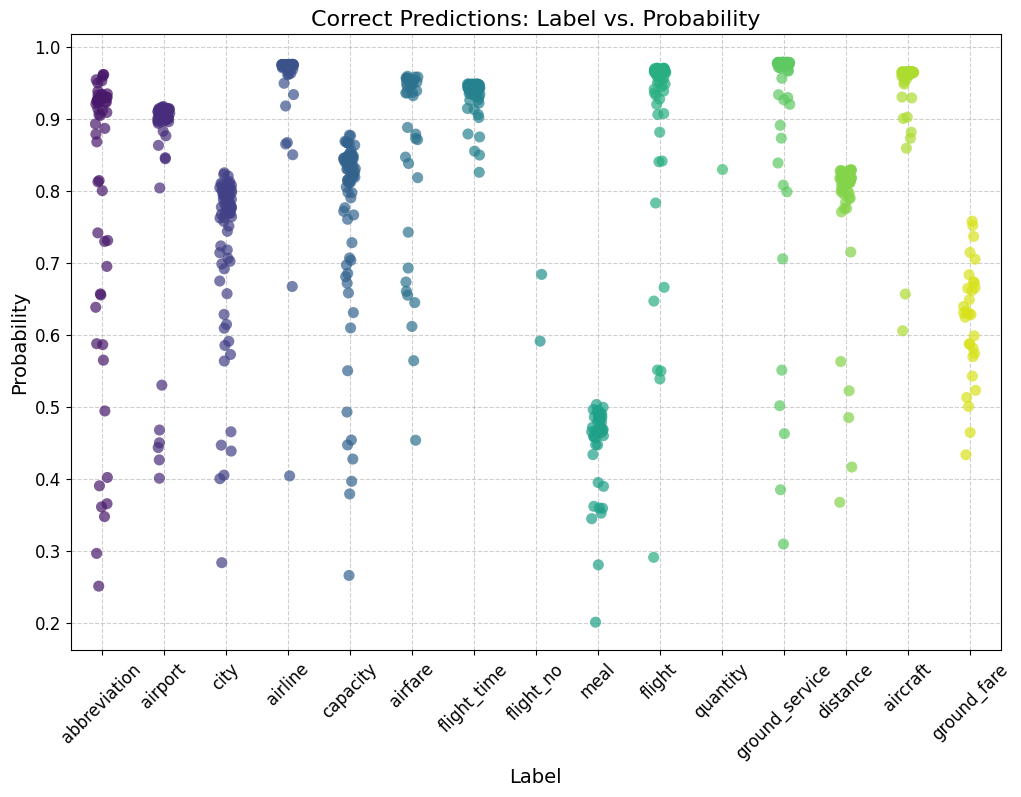

In [ ]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='label', y='probability', data=correct_predictions, jitter=True, palette="viridis", size=8, edgecolor="gray", alpha=0.7)

plt.xlabel('Label', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Correct Predictions: Label vs. Probability', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


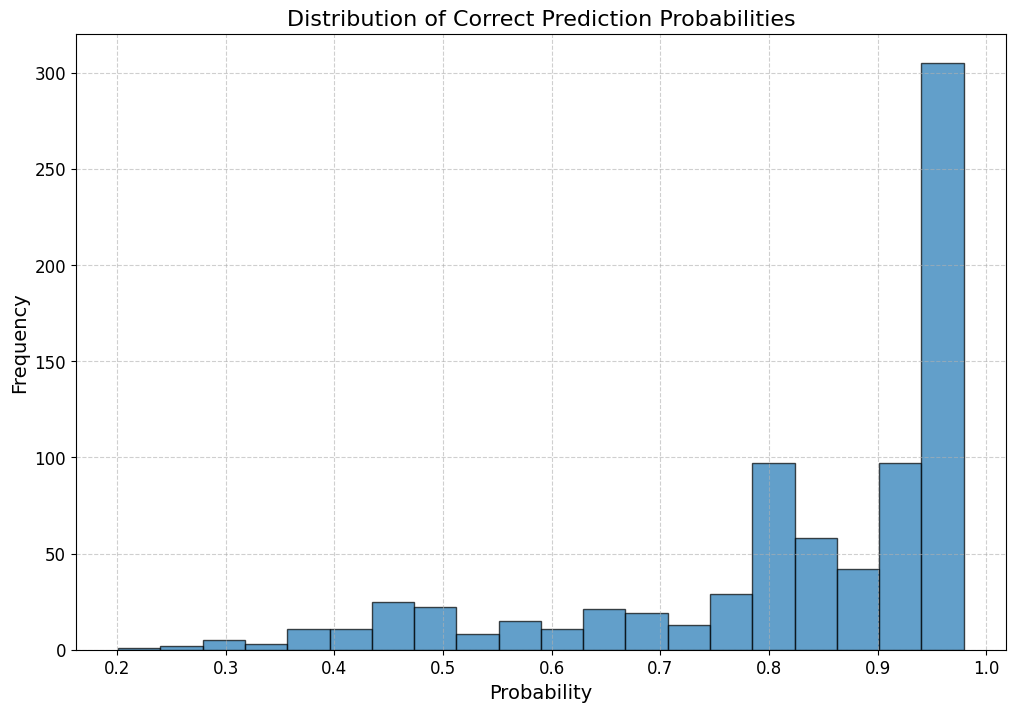

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(correct_predictions['probability'], bins=20, edgecolor='black', alpha=0.7)

plt.xlabel('Probability', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Correct Prediction Probabilities', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


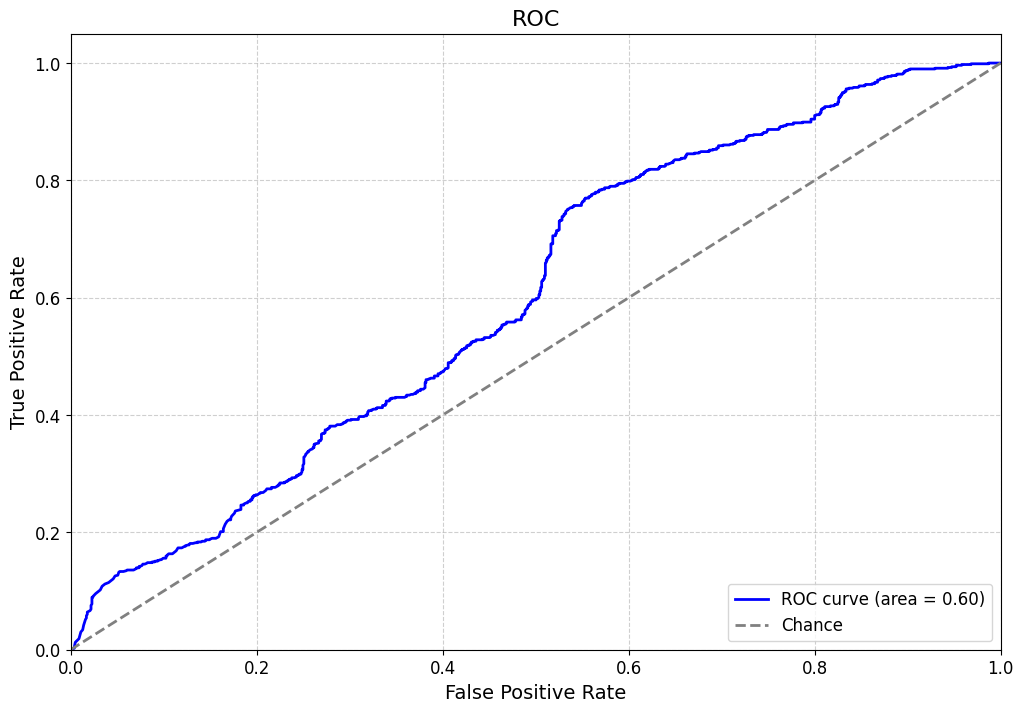

In [ ]:
df['binary_label'] = (df['label'] == df['predicted_label']).astype(int)

# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(df['binary_label'], df['probability'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc="lower right", fontsize=12)
plt.show()


<ipython-input-21-a5aaf514d3fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='label', y='probability', data=incorrect_predictions, jitter=True, palette="viridis", size=8, edgecolor="gray", alpha=0.7)
<ipython-input-21-a5aaf514d3fc>:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='label', y='probability', data=incorrect_predictions, jitter=True, palette="viridis", size=8, edgecolor="gray", alpha=0.7)


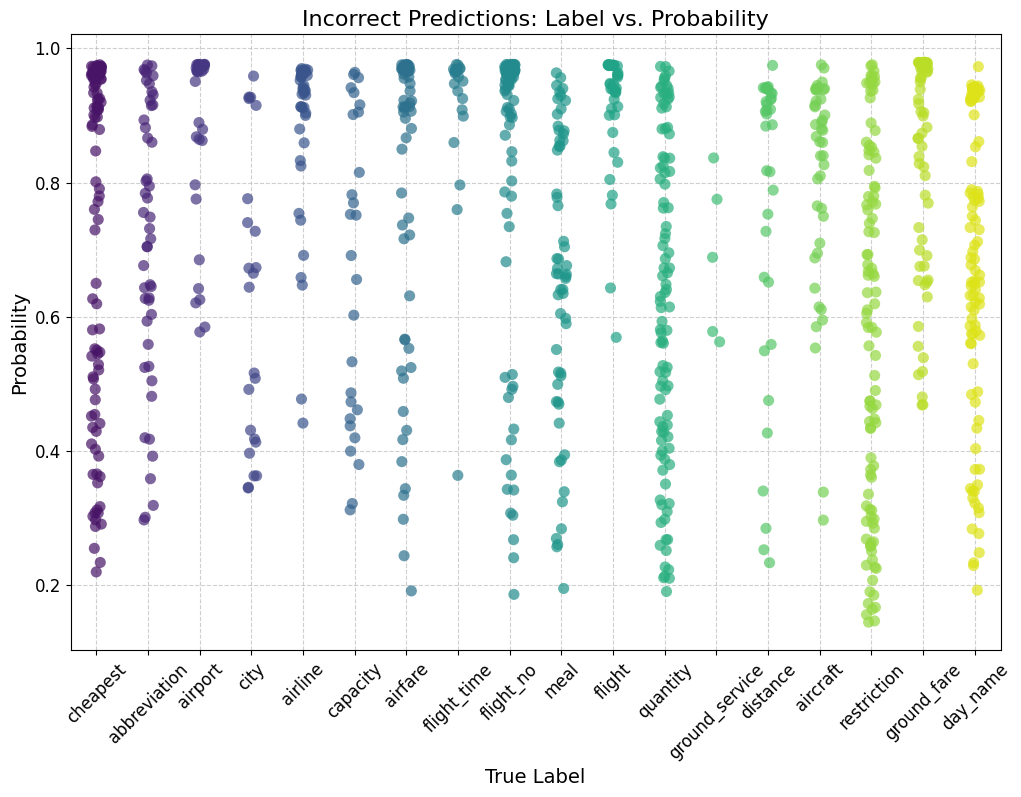

In [ ]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='label', y='probability', data=incorrect_predictions, jitter=True, palette="viridis", size=8, edgecolor="gray", alpha=0.7)

# Enhancing the plot
plt.xlabel('True Label', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.title('Incorrect Predictions: Label vs. Probability', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
